<a href="https://colab.research.google.com/github/robothomas/Simulated-Annealing/blob/main/Simulated_Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulated Annealing Project

In [ ]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from tqdm import tqdm
import numpy as np

## Test set

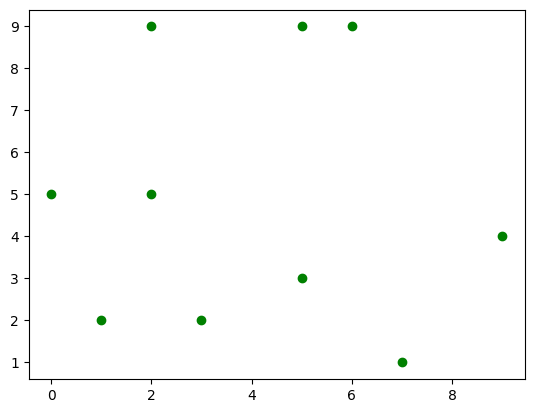

In [ ]:
dotlist = [(1,2),(3,2),(5,9),(5,3),(6,9),(7,1),(9,4),(2,5),(0,5),(2,9)]

# plot each of the points
plt.plot([dotlist[x][0] for x in range(len(dotlist))], [dotlist[y][1] for y in range(len(dotlist))], "go")

## Random Point Generator

Generators of random points utilizing the random.uniform and random.randrange methods for generating real numbers and integers respectively.

In [ ]:
# random decimal points
def randPtsDec(numPoints, low, high):
    points = [0] * numPoints

    for i in range(numPoints):
        points[i] = (random.uniform(low, high), random.uniform(low, high))

    return points

# random integer points
def randPtsInt(numPoints, low, high):
    points = [0] * numPoints

    for i in range(numPoints):
        points[i] = (random.randrange(low, high), random.randrange(low, high))

    return points

In [ ]:
randPtsDec(10, -10, 10)

[(6.50631797983533, 3.4225117116282213),
 (8.356896945478503, 3.9649529332975764),
 (-3.202499271355994, 9.128331911481464),
 (2.178699279447674, 5.94633833011499),
 (3.9317516893335718, 8.860161585863299),
 (-7.739694630689218, -4.208656515822781),
 (9.2287983001012, 8.051555624036247),
 (2.2915532135805172, -2.356873610548962),
 (2.392038032577597, -2.82088524515898),
 (7.805786996110342, -8.68241700949897)]

In [ ]:
randPtsInt(10, -100, 100)

[(-4, -41),
 (23, -68),
 (22, -64),
 (-33, -23),
 (-5, 35),
 (85, -4),
 (83, -38),
 (91, 58),
 (-28, -69),
 (-18, 16)]

## Path Distance Function

Finding distance of a path in traveling salesperson problem. In this case, it also includes the distance from the final point back to the starting point

In [ ]:
def pathDistance(path):
  dist = 0

  # calculates from first to last point
  for i in range(len(path) - 1):
    dist += math.sqrt((path[i+1][0] - path[i][0])**2 + (path[i+1][1] - path[i][1])**2)

  # adds in distance from from last to first point
  dist += math.sqrt((path[-1][0] - path[0][0])**2 + (path[-1][1] - path[0][1])**2)

  return dist

This is testing with a simple unit square to make sure that the distance formula is working properly

In [ ]:
unitSquare = [(0, 0), (1, 0), (1, 1), (0, 1)]
pathDistance(unitSquare)

4.0

## Shuffling Functions

This function takes two random points and swaps them. This process repeats numShuffles times

In [ ]:
# change position of a pair of points for each shuffle
def shufflePair(path, numShuffles):
  for _ in range(numShuffles):
    spotOne = random.randrange(len(path))
    spotTwo = random.randrange(len(path))

    # if they choose same spot, change it until they are different
    while spotOne == spotTwo:
      spotTwo = random.randrange(len(path))

    # swap the positions
    path[spotOne], path[spotTwo] = path[spotTwo], path[spotOne]

  # return new path
  return path

In [ ]:
print(dotlist)
print(shufflePair(dotlist, 1))

[(1, 2), (3, 2), (5, 9), (5, 3), (6, 9), (7, 1), (9, 4), (2, 5), (0, 5), (2, 9)]
[(1, 2), (3, 2), (5, 9), (6, 9), (5, 3), (7, 1), (9, 4), (2, 5), (0, 5), (2, 9)]


This function takes a section of a path, inverts it, and puts the inverted section of the path back into the original

In [ ]:
def invertSubList(path, listLength):
  # choose a sublist and then invert it
  inx = random.randint(0, len(path) - listLength)
  if inx + listLength < len(path):
    # then we choose path[inx: inx + listLength]
    temp = path[inx: inx + listLength]
    temp.reverse()
    path[inx: inx + listLength] = temp
  else:
    # then we choose path[inx: ]
    temp = path[inx:]
    temp.reverse()
    path[inx:] = temp
  return path

## Simulated Annealing Functions

### Wikipedia Method

This method was the one copied from the Wikipedia article on Simulated Annealing, which focuses on changing the temperature value according to the current iteration

In [ ]:
def sawiki(path, kmax):
  dotnum = len(path)
  tempDisList = path
  minDis = pathDistance(tempDisList)
  minDisList = []
  for k in range(kmax-1):
    totalDis = pathDistance(tempDisList)
    t = 1 - (k + 1)/kmax

    # stop if temp hits zero?
    #if t == 0:
    #  break

    if totalDis <= minDis:
      minDis = totalDis
      minDisList = tempDisList
    else:
      # random chance based on temp to increase
      p = random.uniform(0,1)
      cost = totalDis - minDis
      if p <= math.exp(-cost / t):
        minDis = totalDis
        minDisList = tempDisList

    #shuffle
    rSlots = random.randrange(len(tempDisList))
    tempDisList = invertSubList(tempDisList, rSlots)

  return minDis, minDisList

In [ ]:
dist, path = sawiki(dotlist, 100000)
print(dist)
print(path)

36.468793747345046
[(5, 3), (0, 5), (6, 9), (2, 5), (5, 9), (1, 2), (3, 2), (9, 4), (2, 9), (7, 1)]


### Linear Method

In [ ]:
def saLin(path, alpha):
  dotnum = len(path)
  tempDisList = path
  minDis = pathDistance(tempDisList)
  minDisList = []

  t = 1

  while t > 0:
    totalDis = pathDistance(tempDisList)

    if totalDis <= minDis:
      minDis = totalDis
      minDisList = tempDisList
    else:
      # random chance based on temp to increase
      p = random.uniform(0,1)
      cost = totalDis - minDis
      if p <= math.exp(-cost / t):
        minDis = totalDis
        minDisList = tempDisList

    #shuffle
    tempDisList = shufflePair(tempDisList, 1)

    # decrease temp
    t -= alpha

  return minDis, minDisList

In [ ]:
dist, path = saLin(dotlist, 10)
print(dist)
print(path)

63.33309532478177
[(5, 3), (0, 5), (6, 9), (1, 2), (5, 9), (2, 5), (3, 2), (9, 4), (2, 9), (7, 1)]


### Geometric Method

In [ ]:
def saGeo(path, kmax, alpha):
  dotnum = len(path)
  tempDisList = path
  minDis = pathDistance(tempDisList)
  minDisList = []

  t = 1

  for k in range(kmax):
    totalDis = pathDistance(tempDisList)

    # stop if temp hits zero?
    if t == 0:
      break

    if totalDis <= minDis:
      minDis = totalDis
      minDisList = tempDisList
    else:
      # random chance based on temp to increase
      p = random.uniform(0,1)
      cost = totalDis - minDis
      if p <= math.exp(-cost / t):
        minDis = totalDis
        minDisList = tempDisList

    #shuffle
    tempDisList = shufflePair(tempDisList, 1)

    # temp decrease
    t = t * alpha

  return minDis, minDisList

In [ ]:
dist, path = saGeo(dotlist, 100000, 0.99)
print(dist)
print(path)

29.66327593272365
[(6, 9), (9, 4), (5, 3), (1, 2), (0, 5), (2, 9), (7, 1), (5, 9), (2, 5), (3, 2)]


### Slow Decrease Method

In [ ]:
def saSlowDec(path, kmax, beta):
  dotnum = len(path)
  tempDisList = path
  minDis = pathDistance(tempDisList)
  minDisList = []
  t = 1

  for k in range(kmax):
    totalDis = pathDistance(tempDisList)

    if totalDis <= minDis:
      minDis = totalDis
      minDisList = tempDisList
    else:
      # random chance based on temp to increase
      p = random.uniform(0,1)
      cost = totalDis - minDis
      if p <= math.exp(-cost / t):
        minDis = totalDis
        minDisList = tempDisList

    #shuffle
    tempDisList = shufflePair(tempDisList, 1)

    # lower temperature
    t = t / (1 + beta*t)

  return minDis, minDisList

In [ ]:
dist, path = saSlowDec(dotlist, 1000000, 0.1)
print(dist)
print(path)

29.66327593272365
[(3, 2), (7, 1), (2, 9), (5, 9), (0, 5), (6, 9), (2, 5), (5, 3), (1, 2), (9, 4)]


### Generalized Method

In [ ]:
def saGen(path, kmax, const, tempDec, shuffle, numShuffle):
  dotnum = len(path)
  tempDisList = path.copy()
  minDis = pathDistance(tempDisList)
  minDisList = []
  t = 1

  for k in range(kmax):
    if t <= 0:
      break

    totalDis = pathDistance(tempDisList)

    if totalDis <= minDis:
      minDis = totalDis
      minDisList = tempDisList.copy()
    else:
      # random chance based on temp to increase
      p = random.uniform(0,1)
      cost = totalDis - minDis
      if p <= math.exp(-cost / t):
        minDis = totalDis
        minDisList = tempDisList.copy()

    #shuffle
    if shuffle == "pair":
      tempDisList = shufflePair(tempDisList, numShuffle)
    elif shuffle == "rpair":
      rSlots = random.randrange(len(tempDisList))
      tempDisList = shufflePair(tempDisList, rSlots)
    elif shuffle == "isl":
      tempDisList = invertSubList(tempDisList, numShuffle)
    elif shuffle == "risl":
      rSlots = random.randrange(len(tempDisList))
      tempDisList = invertSubList(tempDisList, rSlots)
    else:
      raise ValueError("Not pair, rpair, isl, risl")

    # lower temperature
    if tempDec == "lin":
      t -= const
    elif tempDec == "geo":
      t *= const
    elif tempDec == "slowDec":
      t = t / (1 + const*t)
    elif tempDec == "wiki":
      if k == kmax - 1:
        break
      else:
        t = 1 - (k + 1)/kmax # for wikipedia method, there will be 1 less iteration than other methods
    else:
      raise ValueError("Not lin, geo, or slowDec")



  return minDis, minDisList

31.235448275311196


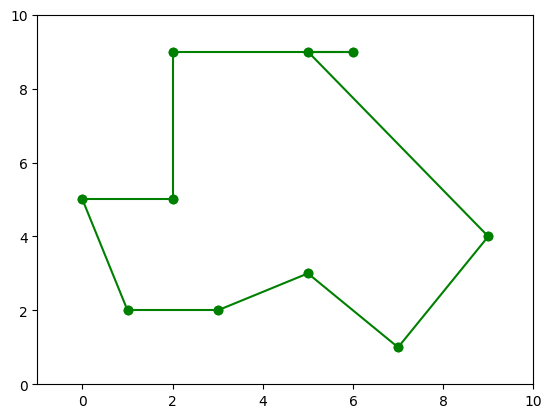

In [ ]:
distance, path = saGen(dotlist, 100000, 0.1, "slowDec", "risl", 1)
print(distance)
drawGraph(path)

### Distance Tracing Methods

Used for seeing how the algorithm changes its minimum value over time. These functions are otherwise unchanged from the definitions above

#### Wikipedia

This is the tracing function for just the Wikipedia method

In [ ]:
def sawikiTrace(path, kmax, shuffle):
  totalDisList = []
  dotnum = len(path)
  tempDisList = path
  minDis = pathDistance(tempDisList)
  minDisList = []
  for k in range(kmax-1):
    totalDis = pathDistance(tempDisList)
    t = 1 - (k + 1)/kmax

    # stop if temp hits zero?
    #if t == 0:
    #  break

    if totalDis <= minDis:
      minDis = totalDis
      minDisList = tempDisList
      totalDisList.append(totalDis)
    else:
      # random chance based on temp to increase
      p = random.uniform(0,1)
      cost = totalDis - minDis
      if p <= math.exp(-cost / t):
        minDis = totalDis
        minDisList = tempDisList
        totalDisList.append(totalDis)

    #shuffle
    if shuffle == "pair":
      tempDisList = shufflePair(tempDisList, numShuffle)
    elif shuffle == "rpair":
      rSlots = random.randrange(len(tempDisList))
      tempDisList = shufflePair(tempDisList, rSlots)
    elif shuffle == "isl":
      tempDisList = invertSubList(tempDisList, numShuffle)
    elif shuffle == "risl":
      rSlots = random.randrange(len(tempDisList))
      tempDisList = invertSubList(tempDisList, rSlots)
    else:
      raise ValueError("Not pair, rpair, isl, risl")

  return totalDisList

#### Generalized

This is the tracing function for the generalized algorithm

In [ ]:
def saGenTrace(path, kmax, const, tempDec, shuffle, numShuffle):
  totalDistLst = []
  dotnum = len(path)
  tempDisList = path.copy()
  minDis = pathDistance(tempDisList)
  minDisList = []
  t = 1

  for k in range(kmax):
    if t <= 0:
      break

    totalDis = pathDistance(tempDisList)

    if totalDis <= minDis:
      minDis = totalDis
      minDisList = tempDisList.copy()
      totalDistLst.append(totalDis)
    else:
      # random chance based on temp to increase
      p = random.uniform(0,1)
      cost = totalDis - minDis
      if p <= math.exp(-cost / t):
        minDis = totalDis
        minDisList = tempDisList.copy()
        totalDistLst.append(totalDis)

    #shuffle
    if shuffle == "pair":
      tempDisList = shufflePair(tempDisList, numShuffle)
    elif shuffle == "rpair":
      rSlots = random.randrange(len(tempDisList))
      tempDisList = shufflePair(tempDisList, rSlots)
    elif shuffle == "isl":
      tempDisList = invertSubList(tempDisList, numShuffle)
    elif shuffle == "risl":
      rSlots = random.randrange(len(tempDisList))
      tempDisList = invertSubList(tempDisList, rSlots)
    else:
      raise ValueError("Not pair, rpair, isl, risl")

    # lower temperature
    if tempDec == "lin":
      t -= const
    elif tempDec == "geo":
      t *= const
    elif tempDec == "slowDec":
      t = t / (1 + const*t)
    elif tempDec == "wiki":
        t = 1 - (k + 1)/kmax # for wikipedia method, there will be 1 less iteration than other methods
    else:
      raise ValueError("Not lin, geo, or slowDec")



  return totalDistLst

#### Generalized Change at Specific Iterations

This next version has an array that has the minimum value at each iteration, so one can see the progress at a specific iteration and see how much improvement it appears to be making over time

In [ ]:
def saGenTraceIter(path, kmax, const, tempDec, shuffle, numShuffle):
  totalDistLst = [0] * kmax
  dotnum = len(path)
  tempDisList = path.copy()
  minDis = pathDistance(tempDisList)
  minDisList = []
  t = 1

  for k in range(kmax):
    if t <= 0:
      break

    totalDis = pathDistance(tempDisList)

    if totalDis <= minDis:
      minDis = totalDis
      minDisList = tempDisList.copy()
      totalDistLst[k] = totalDis
    else:
      # random chance based on temp to increase
      p = random.uniform(0,1)
      cost = totalDis - minDis
      if p <= math.exp(-cost / t):
        minDis = totalDis
        minDisList = tempDisList.copy()
        totalDistLst[k] = totalDis
      else:
        totalDistLst[k] = minDis

    #shuffle
    if shuffle == "pair":
      tempDisList = shufflePair(tempDisList, numShuffle)
    elif shuffle == "rpair":
      rSlots = random.randrange(len(tempDisList))
      tempDisList = shufflePair(tempDisList, rSlots)
    elif shuffle == "isl":
      tempDisList = invertSubList(tempDisList, numShuffle)
    elif shuffle == "risl":
      rSlots = random.randrange(len(tempDisList))
      tempDisList = invertSubList(tempDisList, rSlots)
    else:
      raise ValueError("Not pair, rpair, isl, risl")

    # lower temperature
    if tempDec == "lin":
      t -= const
    elif tempDec == "geo":
      t *= const
    elif tempDec == "slowDec":
      t = t / (1 + const*t)
    elif tempDec == "wiki":
        t = 1 - (k + 1)/kmax # for wikipedia method, there will be 1 less iteration than other methods
    else:
      raise ValueError("Not lin, geo, or slowDec")



  return totalDistLst

## Graph Drawing Function

This function is used to plot the closed circuit traveling salesman paths between the vertices that are provided

In [ ]:
def drawGraph(path):
  temp_path = sorted(path, key = lambda x: x[0], reverse = True)
  min_x = temp_path[-1][0]
  max_x = temp_path[0][0]
  temp_path = sorted(path, key = lambda x: x[1], reverse = True)
  min_y = temp_path[-1][1]
  max_y = temp_path[0][1]
  for i in range(len(path)-1):
    # plot line between point i and i + 1
    line_x = [path[i][0], path[i+1][0]]
    line_y = [path[i][1], path[i+1][1]]
    plt.plot(line_x, line_y, 'go-')
  # last line
  line_x = [path[-1][0], path[0][0]]
  line_y = [path[-1][1], path[0][1]]
  plt.plot(line_x, line_y, 'go-')

  plt.xlim([min_x - 1, max_x + 1])
  plt.ylim([min_y - 1, max_y + 1])

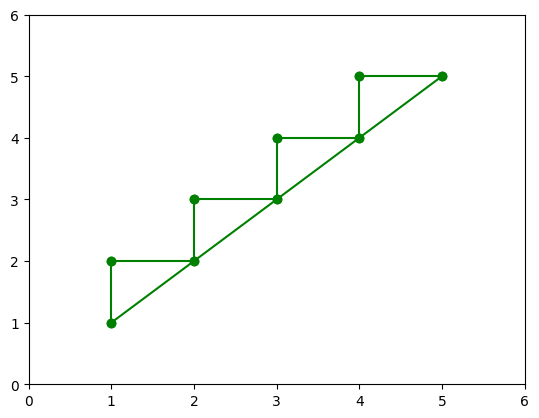

In [ ]:
# try the function
test_path = [(1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4), (4, 5), (5, 5)]
drawGraph(test_path)

##Effectiveness of Shuffle Methods

This function finds the average distance for some path given a particular shuffle method. Using this, hopefully it can become clear which method is more effecient

In [ ]:
def testAvgDistShuffle(path, numTrials, numTests, shuffleMethod, numShuffle):
  #path = randPtsDec(100, -10, 10)
  distances = [0] * numTests
  for i in range(numTests):
    distances[i], path = saGen(path, numTrials, 0.1, "slowDec", shuffleMethod, numShuffle)
  return sum(distances) / numTests

### Fixed Pairs

In [ ]:
testAvgDistShuffle(dotlist, 500, 10000, "pair", 1)

30.64681142891619

### Random Pairs

In [ ]:
testAvgDistShuffle(dotlist, 500, 10000, "rpair", 0)

30.05800745458021

### Fixed Inverted Sublist

In [ ]:
testAvgDistShuffle(dotlist, 500, 10000, "isl", 3)

30.182705624129053

### Randomized Inverted Sublist

In [ ]:
testAvgDistShuffle(dotlist, 500, 10000, "risl", 0)

30.90110150527222

## Comparing Temperature Methods

Finds the average distance of the path found by the temperature method

In [ ]:
def testAvgDistTemp(path, numTrials, numTests, method, constVal):
  #path = randPtsDec(100, -10, 10)
  distances = [0] * numTests
  for i in tqdm(range(numTests)):
    distances[i], path = saGen(path, numTrials, constVal, method, "risl", 0)
  return sum(distances) / numTests

### Linear

Average distance of the linear decrement method

In [ ]:
testAvgDistTemp(dotlist, 100000, 100, "lin", 0.00001)

100%|██████████| 100/100 [02:16<00:00,  1.37s/it]


33.53414769546318

A plot of the simulated annealing using the linear decrement method

Text(0, 0.5, 'distance')

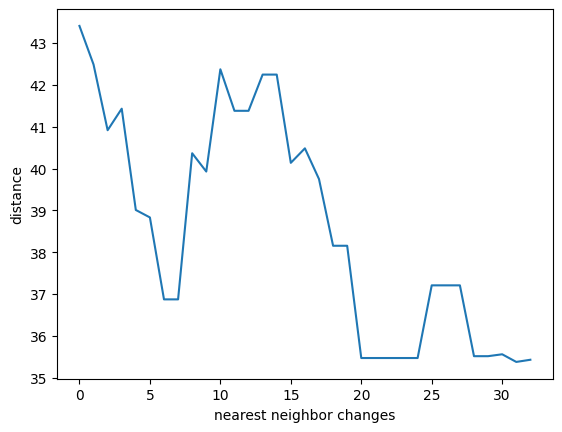

In [ ]:
totalDist = saGenTrace(dotlist, 100000, 0.0001, "lin", "risl", 1)
plt.plot(totalDist)
plt.xlabel("nearest neighbor changes")
plt.ylabel("distance")

### Geometric

Average distance of the geometric temperature reduction method

In [ ]:
testAvgDistTemp(dotlist, 100000, 100, "geo", 0.9)

100%|██████████| 100/100 [02:10<00:00,  1.30s/it]


33.16763439256555

Plot of the simulated annealing of the geometric temperature reduction method

Text(0, 0.5, 'distance')

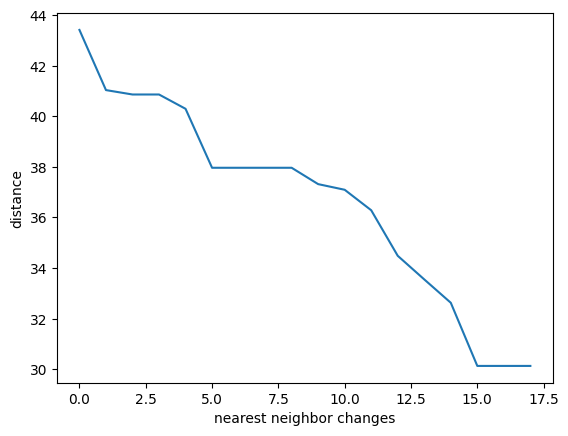

In [ ]:
totalDist = saGenTrace(dotlist, 100000, 0.9, "geo", "risl", 1)
plt.plot([i for i in range(len(totalDist))], totalDist)
plt.xlabel("nearest neighbor changes")
plt.ylabel("distance")

### Slow Decrease

Plot of the simulated annealing of the slow decrease temperature reduction method

<ipython-input-22-36c670c53603>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, len(totalDist), 1)


(0.0, 17.0)

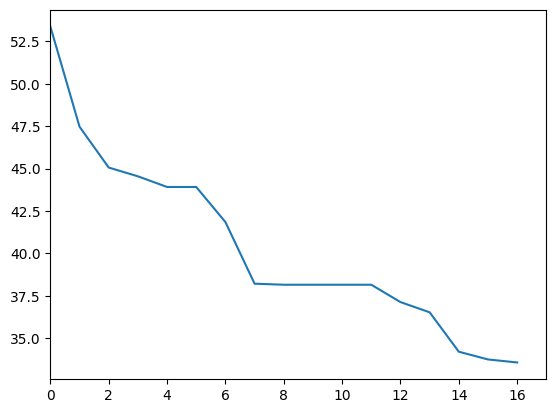

In [ ]:
totalDist = saGenTrace(dotlist, 100000, 0.1, "slowDec", "risl", 1)
plt.plot(totalDist)
plt.xlim(0, len(totalDist), 1)

### Wikipedia method

Plot of the simulated annealing of Wikipedia's temperature reduction method

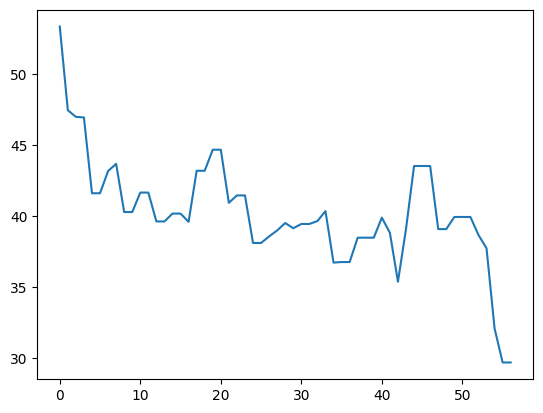

In [ ]:
totalDist = sawikiTrace(dotlist, 100000, "risl")
plt.plot(totalDist)

### Best Path

The best path we have found with this test set. It does not appear like there is anything left to improve upon

29.66327593272365


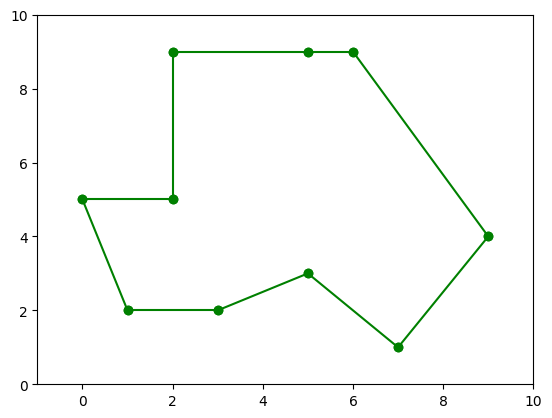

In [ ]:
distance, path = saGen(dotlist, 100000, 0.1, "slowDec", "risl", 1)
print(distance)
drawGraph(path)

### Comparison of All Temperature Reduction Methods by Iteration

Test all of the functions with fairly good constants for 400,000 iterations

In [ ]:
totalDistLin = saGenTraceIter(dotlist, 400000, 0.000001, "lin", "risl", 1)
totalDistGeo = saGenTraceIter(dotlist, 400000, 0.9, "geo", "risl", 1)
totalDistSlowDec = saGenTraceIter(dotlist, 400000, 0.1, "slowDec", "risl", 1)
totalDistWiki = saGenTraceIter(dotlist, 400000, 0, "wiki", "risl", 1)

Plot them all together on the same graph

Text(0, 0.5, 'distance')

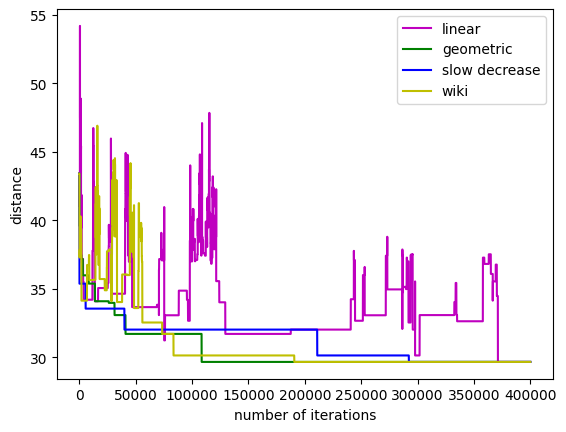

In [ ]:
plt.plot(totalDistLin, "m-", label="linear")
plt.plot(totalDistGeo, "g-", label="geometric")
plt.plot(totalDistSlowDec, "b-", label="slow decrease")
plt.plot(totalDistWiki, "y-", label="wiki")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("distance")

## Average Distance for N Random Points

Tests the average distance added for every random point

In [ ]:
def avgDistPoints(numPoints, numIterations, numTests):
  distances = [0] * numTests
  for i in range(numTests):
    randPoints = randPtsDec(numPoints, -10, 10)
    dist, path = saGen(randPoints, numIterations, 0.9, "geo", "risl", 1)
    distances[i] = dist
  return sum(distances) / numTests

Gets the distances and then plots the average distance versus the number of points

In [ ]:
randPointXVals = [x for x in range(2, 100, 5)]
randPointDistances = [avgDistPoints(num, 10000, 10) for num in randPointXVals]

Text(0, 0.5, 'average distance')

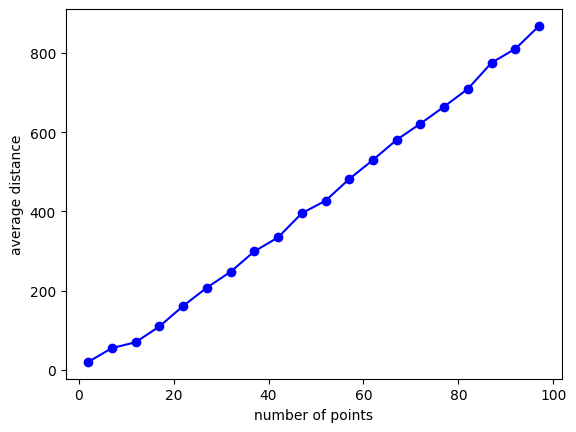

In [ ]:
plt.plot(randPointXVals, randPointDistances, "bo-")
plt.xlabel("number of points")
plt.ylabel("average distance")

## Animation

### Simulated Annealing Path Tracker

Simulated Annealing Function that keeps track of all paths as it goes through the algorithm

In [ ]:
def saGenGetAllPath(dotlist, kmax, const, tempDec, shuffle, numShuffle):
  totalDistLst = [0] * kmax
  dotnum = len(dotlist)
  tempDisList = dotlist
  minDis = pathDistance(tempDisList)
  minDisList = []
  currPathLst = [tempDisList]
  currDisLst = []
  t = 1

  for k in range(kmax):
    if t <= 0:
      break

    totalDis = pathDistance(tempDisList)

    if totalDis <= minDis:
      minDis = totalDis
      minDisList = tempDisList
      totalDistLst[k] = totalDis
      currPathLst.append(tempDisList.copy())
      currDisLst.append(totalDis)
    else:
      # random chance based on temp to increase
      p = random.uniform(0,1)
      cost = totalDis - minDis
      if p <= math.exp(-cost / t):
        minDis = totalDis
        minDisList = tempDisList
        totalDistLst[k] = totalDis
        currPathLst.append(tempDisList.copy())
        currDisLst.append(totalDis)
      else:
        totalDistLst[k] = minDis

    #shuffle
    if shuffle == "pair":
      tempDisList = shufflePair(tempDisList, numShuffle)
    elif shuffle == "rpair":
      rSlots = random.randrange(len(tempDisList))
      tempDisList = shufflePair(tempDisList, rSlots)
    elif shuffle == "isl":
      tempDisList = invertSubList(tempDisList, numShuffle)
    elif shuffle == "risl":
      rSlots = random.randrange(len(tempDisList))
      tempDisList = invertSubList(tempDisList, rSlots)
    else:
      raise ValueError("Not pair, rpair, isl, risl")

    # lower temperature
    if tempDec == "lin":
      t -= const
    elif tempDec == "geo":
      t *= const
    elif tempDec == "slowDec":
      t = t / (1 + const*t)
    elif tempDec == "wiki":
      if k == kmax - 1:
        break
      else:
        t = 1 - (k + 1)/kmax # for wikipedia method, there will be 1 less iteration than other methods
    else:
      raise ValueError("Not lin, geo, or slowDec")

  return currPathLst, currDisLst

### Traveling Salesperson Animation for Test Set

List of all of the minimal paths

In [ ]:
currPathLst, currDisLst = saGenGetAllPath(dotlist, 100000, 0.1, 'slowDec', 'risl', 1)

Animate going through each path change

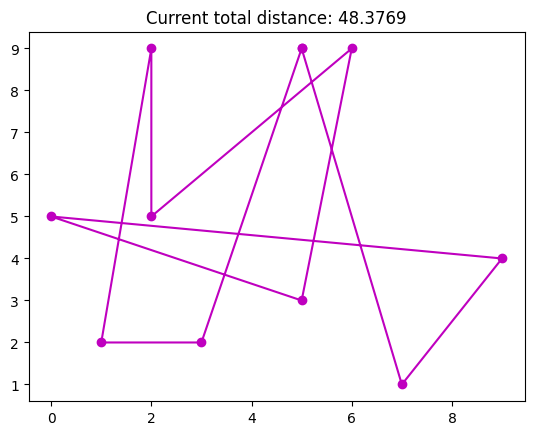

In [ ]:
rc('animation', html='jshtml')

num_frame = len(currPathLst)

# Create a figure and axis
fig, ax = plt.subplots()

def update(frame):
  ax.clear()
  currPath = np.array(currPathLst[frame])
  currPath = currPath.T
  x = currPath[0, :]
  y = currPath[1, :]
  x = np.append(x, x[0])
  y = np.append(y, y[0])
  currDis = round(currDisLst[frame], 4)
  plt.title("Current total distance: {}".format(currDis))
  plot = ax.plot(x, y, 'mo-')
  return plot

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frame - 1, blit=False, repeat = True)

ani

## US Cities Example

### City coordinates

The (x, y) coordinates of the US Cities

In [ ]:
cities = [(6734, 1453),
(2233,   10),
(5530, 1424),
 (401,  841),
(3082, 1644),
(7608, 4458),
(7573, 3716),
(7265, 1268),
(6898, 1885),
(1112, 2049),
(5468, 2606),
(5989, 2873),
(4706, 2674),
(4612, 2035),
(6347, 2683),
(6107,  669),
(7611, 5184),
(7462, 3590),
(7732, 4723),
(5900, 3561),
(4483, 3369),
(6101, 1110),
(5199, 2182),
(1633, 2809),
(4307, 2322),
(675, 1006),
(7555, 4819),
(7541, 3981),
(3177,  756),
(7352, 4506),
(7545, 2801),
(3245, 3305),
(6426, 3173),
(4608, 1198),
  (23, 2216),
(7248, 3779),
(7762, 4595),
(7392, 2244),
(3484, 2829),
(6271, 2135),
(4985,  140),
(1916, 1569),
(7280, 4899),
(7509, 3239),
  (10, 2676),
(6807, 2993),
(5185, 3258),
(3023, 1942)]

A rough plot of the U.S. cities based off of the above coordinates

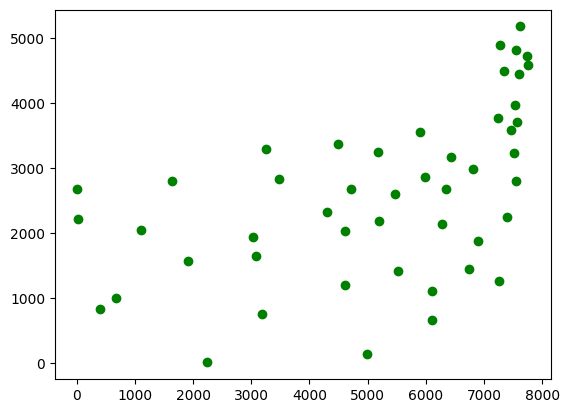

In [ ]:
plt.plot([cities[x][0] for x in range(len(cities))], [cities[y][1] for y in range(len(cities))], "go")

### Finding a Good Path

This is how the path starts, completely unchanged from above

157530.24624994464

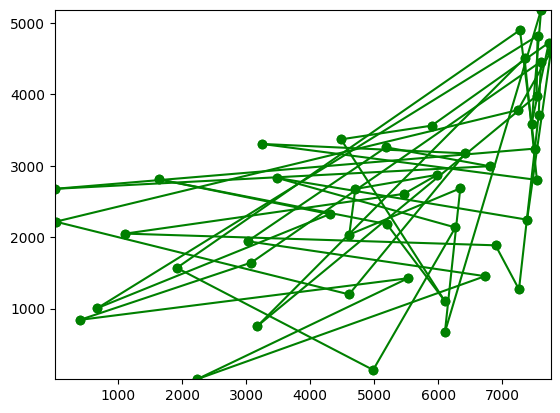

In [ ]:
drawGraph(cities)
pathDistance(cities)

106462.8600732906


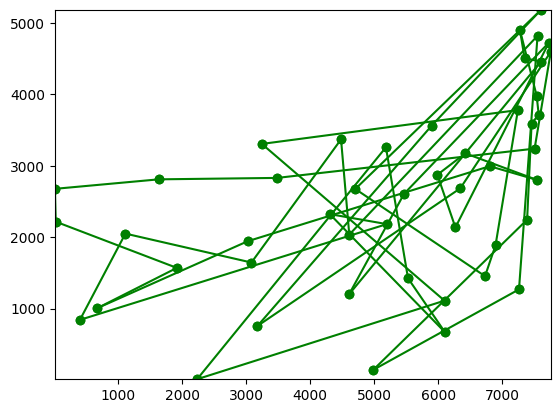

In [ ]:
distance, newPath = saGen(cities, 1000000, 0.01, "slowDec", "risl", 0)
drawGraph(newPath)
print(distance)

### Animation

This function goes through the algorithm and makes all of the paths needed for the animation

In [ ]:
currPathLst, currDisLst = saGenGetAllPath(cities, 100000, 0.1, 'slowDec', 'risl', 1)

This creates the animation based off the paths created in the cell above

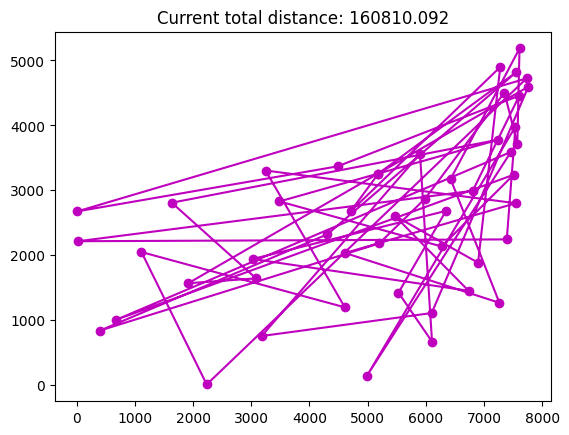

In [ ]:
rc('animation', html='jshtml')

num_frame = len(currPathLst)

# Create a figure and axis
fig, ax = plt.subplots()

def update(frame):
  ax.clear()
  currPath = np.array(currPathLst[frame])
  currPath = currPath.T
  x = currPath[0, :]
  y = currPath[1, :]
  x = np.append(x, x[0])
  y = np.append(y, y[0])
  currDis = round(currDisLst[frame], 4)
  plt.title("Current total distance: {}".format(currDis))
  plot = ax.plot(x, y, 'mo-')
  return plot

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frame - 1, blit=False, repeat = True)

ani